In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Generate Data

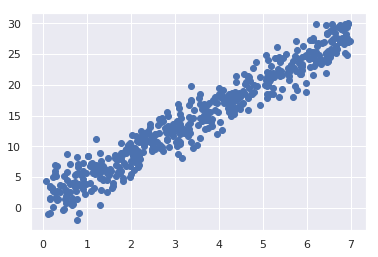

In [2]:
x_min = 0
x_max = 7
n = 500
seed = 45
noise_std = 2
np.random.seed(seed)

train_X = np.random.uniform(x_min,x_max,n)
theta = np.random.randn(2,1)*2
train_Y = theta[0] + theta[1]*train_X + np.random.normal(0,noise_std,n)

plt.scatter(train_X,train_Y);

#### Set model inputs and weights

In [3]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(5., name="weight")
b = tf.Variable(4., name="bias")

#### Construct a linear model

In [4]:
pred = tf.add(tf.multiply(X, W), b)

#### Hyperparamaters

In [5]:
learning_rate = 0.1
epochs = 100
display_step = 10

#### Loss and optmimizer

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

W0712 17:04:46.321293 140190995961664 deprecation.py:323] From /root/environments/my_env/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Create Init method

In [92]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

#### Train linear model

Epoch: 0010 cost= 2.502203465 
 W= 3.4246387 b= 3.1051524
Epoch: 0020 cost= 2.319518566 
 W= 3.5147514 b= 2.6881714
Epoch: 0030 cost= 2.206198454 
 W= 3.5857248 b= 2.3597496
Epoch: 0040 cost= 2.135903358 
 W= 3.6416283 b= 2.1010659
Epoch: 0050 cost= 2.092302799 
 W= 3.685658 b= 1.8973271
Epoch: 0060 cost= 2.065258265 
 W= 3.720334 b= 1.736856
Epoch: 0070 cost= 2.048485041 
 W= 3.747649 b= 1.6104653
Epoch: 0080 cost= 2.038081646 
 W= 3.769162 b= 1.5109161
Epoch: 0090 cost= 2.031630039 
 W= 3.7861066 b= 1.4325076
Epoch: 0100 cost= 2.027629137 
 W= 3.799454 b= 1.3707496
Optimization Finished!
Training cost= 2.0276291 W= 3.799454 b= 1.3707496 

Real W = [3.84789033], b = [1.20685109]


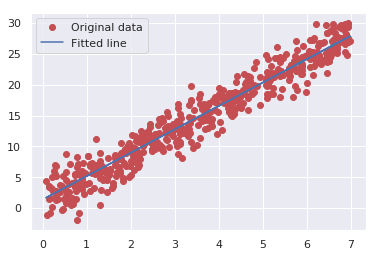

In [94]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"\n","W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    print("Real W = {0}, b = {1}".format(theta[1],theta[0]))
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()